In [1]:
using BSON, Lux, Random, NNlib
include("analysis_tools.jl");

In [2]:
struct StaticConv1D <: Lux.AbstractLuxLayer
    kernel
end

function StaticConv1D(kernel::AbstractArray)
    return StaticConv1D(() -> copy(kernel))
end

Lux.initialparameters(::AbstractRNG, layer::StaticConv1D) = NamedTuple()
Lux.initialstates(::AbstractRNG, layer::StaticConv1D) = (kernel = layer.kernel(),)
function (l::StaticConv1D)(x, ps, st)
    y = NNlib.conv(x, st.kernel)
    return y, st
end;

In [3]:
loaded = BSON.load("models/trained_model_trial.bson")
model = loaded[:model]
Xμ = loaded[:Xμ]
Xσ  = loaded[:Xσ]
n_pad = loaded[:n_pad];

[ Info: Saved animation to /home/matspc/SSD/surrogate_flow/media/TEMP.gif


Plots.AnimatedGif("/home/matspc/SSD/surrogate_flow/media/TEMP.gif")
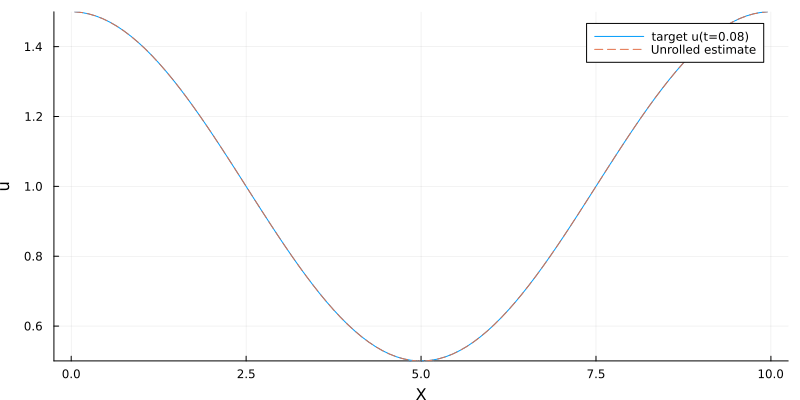

In [5]:
show_unrolling("data/burgers1d_periodicTEMP.jld2", model, Xμ, Xσ, "media/TEMP.gif")

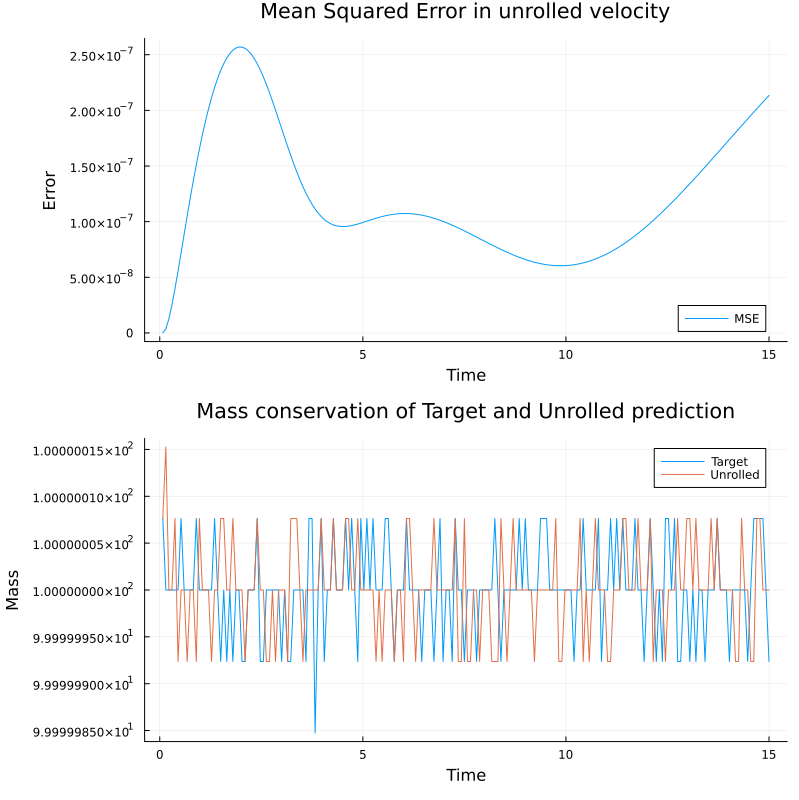

In [4]:
show_plots("data/burgers1d_periodicTEMP.jld2", model, Xμ, Xσ, "media/TEMP.png")

u_mean = 1.5

[ Info: Saved animation to /home/mlenes/Code/surrogate_flow/media/dt_model_u_mean1_5_rich.gif


Plots.AnimatedGif("/home/mlenes/Code/surrogate_flow/media/dt_model_u_mean1_5_rich.gif")
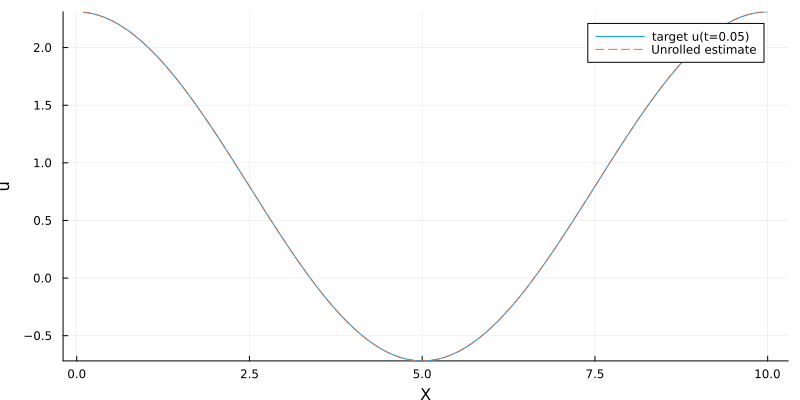

In [5]:
show_unrolling("data/burgers1d_periodic7.jld2", model, Xμ, Xσ, "media/dt_model_u_mean1_5_rich.gif")

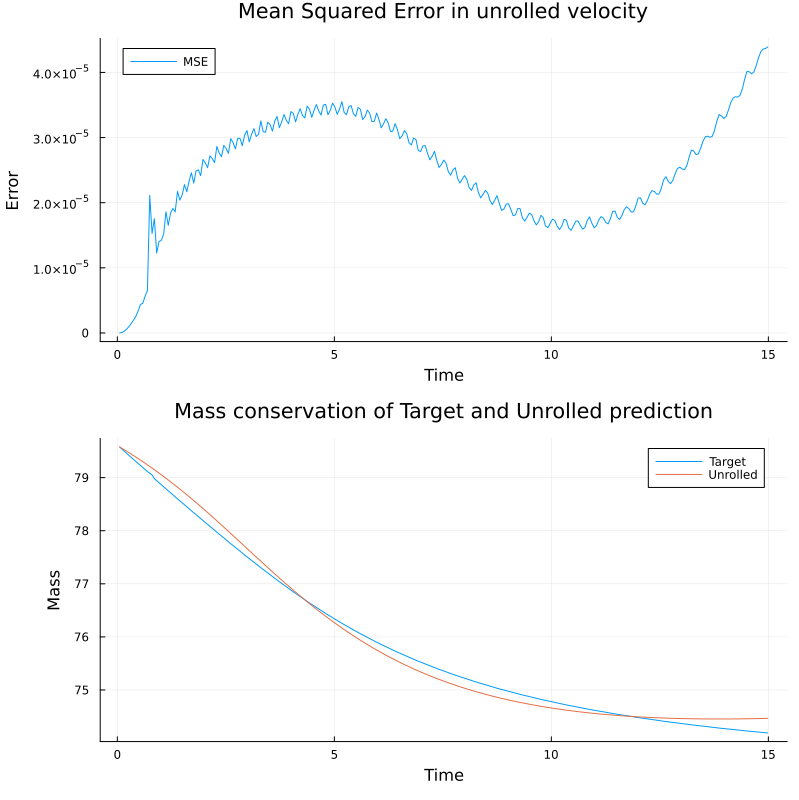

In [6]:
show_plots("data/burgers1d_periodic7.jld2", model, Xμ, Xσ, "media/dt_model_u_mean1_5_rich.png")

[ Info: Saved animation to /home/mlenes/Code/surrogate_flow/media/dt_model_u_amp0_9_rich.gif


Plots.AnimatedGif("/home/mlenes/Code/surrogate_flow/media/dt_model_u_amp0_9_rich.gif")
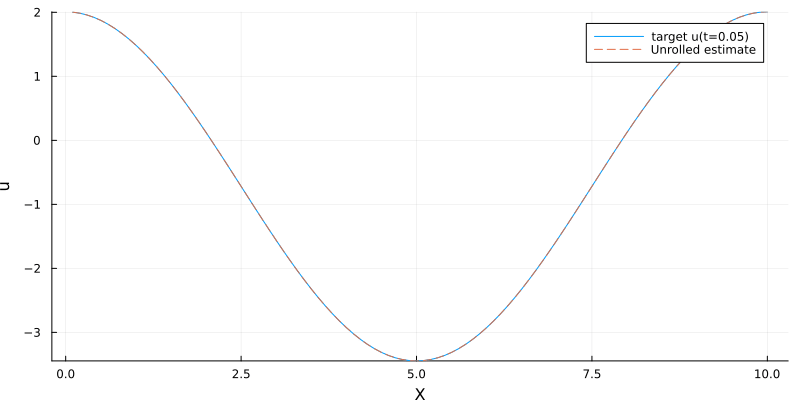

In [8]:
show_unrolling("data/burgers1d_periodic6_dt.jld2", model, Xμ, Xσ, "media/dt_model_u_amp0_9_rich.gif")

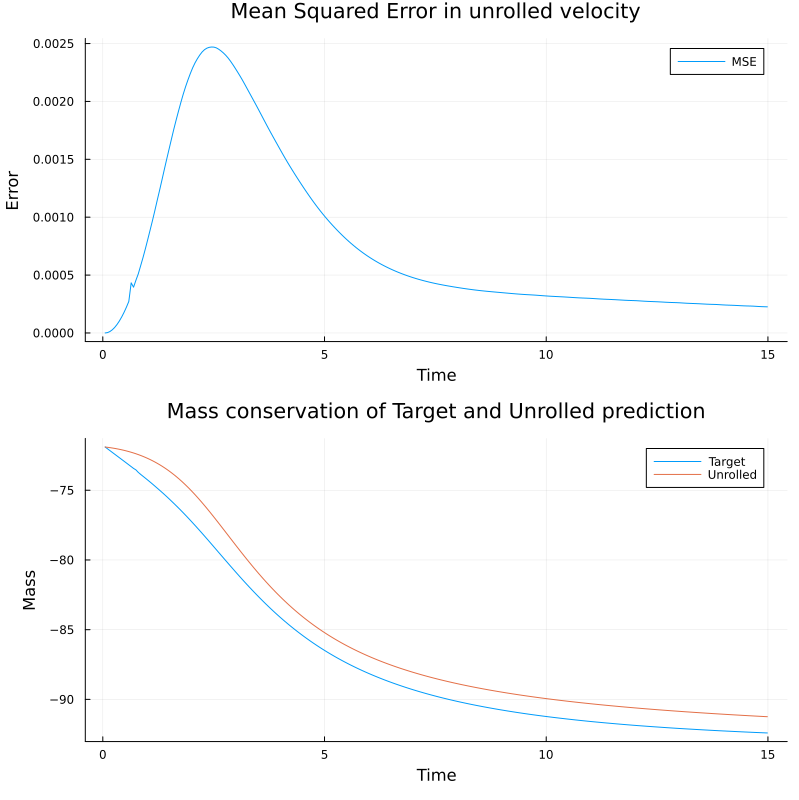

In [3]:
show_plots("data/burgers1d_periodic6_dt.jld2", model, Xμ, Xσ, "media/dt_model_u_amp0_9_rich.png")